In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import root
from scipy.linalg import block_diag
import h5py
import os
import itertools
import pandas as pd
import gvar as gv
import lsqfit
from utils import *
from importlib import reload

import sys
sys.path.append('/Users/theoares/lqcd/utilities')
from fittools import *
from formattools import *
import plottools as pt

style = styles['notebook']
pt.set_font()

### Run bootstrap tests

In [14]:
# bootstraps run
f01 = h5py.File('/Users/theoares/Dropbox (MIT)/research/0nubb/analysis_output/24I/ml0p01/Z_gamma_downstream.h5', 'r')
Zq01_b = f01['ZqbyZV'][()][0]
Z2201_b = f01['Z22byZVsq'][()][0]
k_list = f01['momenta']
f01.close()
mu0 = 2.64203439

f005 = h5py.File('/Users/theoares/Dropbox (MIT)/research/0nubb/analysis_output/24I/ml0p005/Z_gamma_downstream.h5', 'r')
Zq005_b = f005['ZqbyZV'][()][0]
Z22005_b = f005['Z22byZVsq'][()][0]
f005.close()

In [3]:
Z2201_b_mu = np.mean(Z2201_b)
Z2201_b_sigma = np.std(Z2201_b, ddof = 1)
Z22005_b_mu = np.mean(Z22005_b)
Z22005_b_sigma = np.std(Z22005_b, ddof = 1)

print('Z22 on ml0p005 (original): ' + export_float_latex(np.real(Z2201_b_mu), np.real(Z2201_b_sigma)))
print('Z22 on ml0p01 (original): ' + export_float_latex(np.real(Z22005_b_mu), np.real(Z22005_b_sigma)))

Z22 on ml0p005 (original): 1.04949(12)
Z22 on ml0p01 (original): 1.049296(78)


In [4]:
# configs run independently
f01 = h5py.File('/Users/theoares/Dropbox (MIT)/research/0nubb/analysis_output/24I/ml0p01/Z_gamma_no_boot.h5', 'r')
Zq01 = f01['ZqbyZV_cfg'][()]
Z2201 = f01['Z22byZVsq_cfg'][()]
f01.close()

f005 = h5py.File('/Users/theoares/Dropbox (MIT)/research/0nubb/analysis_output/24I/ml0p005/Z_gamma_no_boot.h5', 'r')
Zq005 = f005['ZqbyZV'][()]
Z22005 = f005['Z22byZVsq'][()]
# Zq005 = f005['ZqbyZV_cfg'][()]
# Z22005 = f005['Z22byZVsq_cfg'][()]
f005.close()

In [5]:
Zq005

array([[1.0549506+5.96716673e-05j, 1.0547928+5.00993228e-05j,
        1.0547416-1.61011594e-05j, 1.05462  -7.78628819e-05j,
        1.0546137-6.59862053e-05j, 1.0547186-7.50864201e-05j,
        1.0543469-9.97602401e-05j, 1.0548096-3.15027355e-05j,
        1.0542425-1.10229557e-04j, 1.0546514-7.04473860e-05j,
        1.0544512-1.26476434e-05j, 1.0546473-9.46303699e-05j,
        1.0548121+2.26026568e-05j, 1.0543574-7.38411545e-05j,
        1.0545653+2.33402716e-05j, 1.0544522-4.15625218e-05j,
        1.0545366-4.48014071e-05j, 1.0548711+7.78433678e-05j,
        1.054849 -1.44056830e-05j, 1.0546483-3.72811301e-05j,
        1.0546709-1.81166870e-05j, 1.0546769-9.03817127e-05j,
        1.0548211+4.65498306e-06j, 1.0544032-6.60623555e-05j,
        1.0546405-5.85519192e-05j, 1.0548764+5.30055286e-06j,
        1.0548338-1.32090399e-05j, 1.0547003-4.88906917e-05j,
        1.054577 -1.07951804e-04j, 1.054703 -1.63667664e-05j,
        1.0546881+8.74449233e-06j, 1.0546769-2.47195512e-05j,
        

In [6]:
Z22005_boot = bootstrap(Z22005[0])
Z2201_boot = bootstrap(Z2201[0])

In [7]:
Z22005_boot_mu = np.mean(Z22005_boot)
Z22005_boot_sigma = np.std(Z22005_boot, ddof = 1)
Z2201_boot_mu = np.mean(Z2201_boot)
Z2201_boot_sigma = np.std(Z2201_boot, ddof = 1)

print('Z22 on ml0p005 (after): ' + export_float_latex(np.real(Z22005_boot_mu), np.real(Z22005_boot_sigma)))
print('Z22 on ml0p01 (after): ' + export_float_latex(np.real(Z2201_boot_mu), np.real(Z2201_boot_sigma)))

Z22 on ml0p005 (after): 1.049260(11)
Z22 on ml0p01 (after): 1.04945(12)


## Examine distributions

#### Compare distributions before and after bootstrapping

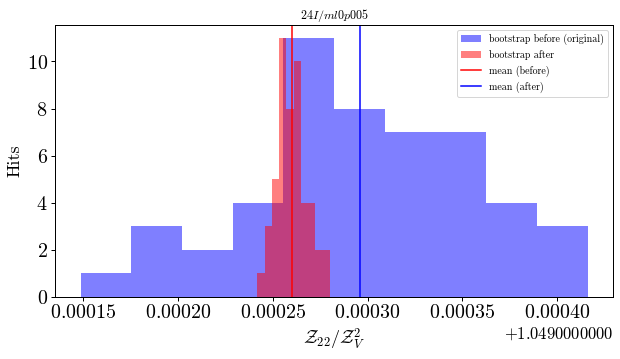

In [8]:
fig, ax = pt.add_subplot()
ax.hist(np.real(Z22005_b), color = 'b', alpha = 0.5, label = 'bootstrap before (original)')
ax.hist(np.real(Z22005_boot), color = 'r', alpha = 0.5, label = 'bootstrap after')
pt.add_line(ax, np.real(Z22005_boot_mu), c = 'r', label = 'mean (before)')
pt.add_line(ax, np.real(Z22005_b_mu), c = 'b', label = 'mean (after)')

ax.set_title(r'$24I/ml0p005$')
ax.set_xlabel(r'$\mathcal{Z}_{22}/\mathcal{Z}_V^2$')
ax.set_ylabel('Hits')
ax.legend()

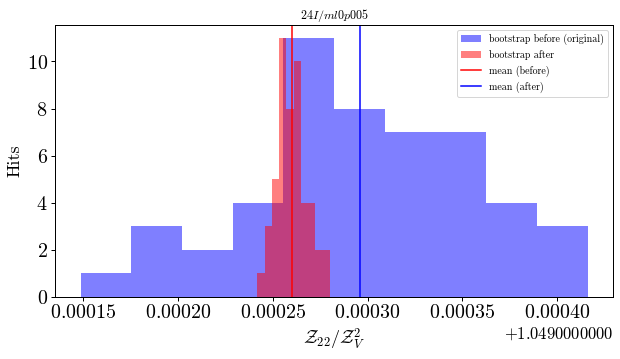

In [9]:
fig, ax = pt.add_subplot()
ax.hist(np.real(Z22005_b), color = 'b', alpha = 0.5, label = 'bootstrap before (original)')
ax.hist(np.real(Z22005_boot), color = 'r', alpha = 0.5, label = 'bootstrap after')
pt.add_line(ax, np.real(Z22005_boot_mu), c = 'r', label = 'mean (before)')
pt.add_line(ax, np.real(Z22005_b_mu), c = 'b', label = 'mean (after)')

ax.set_title(r'$24I/ml0p005$')
ax.set_xlabel(r'$\mathcal{Z}_{22}/\mathcal{Z}_V^2$')
ax.set_ylabel('Hits')
ax.legend()

## Look at results of linear extrapolation

In [30]:
multiplets = np.array([[0, 0], [1, 1], [2, 2], [3, 3], [4, 4], [1, 2], [2, 1], [3, 4], [4, 3]], dtype = object)    # nonzero indices for Lambda
n_multiplets = len(multiplets)

In [45]:
f = h5py.File('/Users/theoares/Dropbox (MIT)/research/0nubb/analysis_output/24I/chiral_extrap/Z_extrap_downstream.h5', 'r')
Zq = f['ZqbyZV/values'][()][0]
Z22 = f['O22/ZijZVm2'][()][0]
Lam = np.zeros((5, 5, n_boot), dtype = np.float64)
ZbyZVsq = np.zeros((5, 5, n_boot), dtype = np.float64)
for mult in multiplets:
    ZbyZVsq[mult[0], mult[1]] = f['O' + str(mult[0] + 1) + str(mult[1] + 1) + '/ZijZVm2'][()][0]    
    Lam[mult[0], mult[1]] = f['Lambda' + str(mult[0] + 1) + str(mult[1] + 1)][()][0]
f.close()

In [47]:
np.mean(ZbyZVsq, axis = 2)

array([[ 0.91342635,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  1.04906366,  0.30026568,  0.        ,  0.        ],
       [ 0.        ,  0.03364241,  0.81813753,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.866784  , -0.0318678 ],
       [ 0.        ,  0.        ,  0.        , -0.27828463,  1.06429881]])

Definition of $\Lambda_{ij}$ in Fig 2. Is it:
$$
\frac{\Lambda_{ij}}{\Lambda_V^2} = P_j \Pi_i
$$
or 
$$
\frac{\Lambda_{ij}}{\Lambda_V^2}\rightarrow \frac{F_{ik}}{F_V^2} \frac{\Lambda}{\Lambda_V^2}^{-1}_{kj}
$$

In [44]:
# 1 / Z22
# Lam22_proj = 1 / Z22
Lam22_proj = Z22 / Zq**2
print(gv.gvar(np.mean(Lam22_proj), np.std(Lam22_proj, ddof = 1)))

0.94356(64)


In [33]:
ainv = 1.784
L = Lattice(24, 64)
F = getF(L)

In [35]:
Lam_gvar = gv.gvar(np.mean(Lam, axis = 2), np.std(Lam, axis = 2, ddof = 1))

In [37]:
np.linalg.inv(Lam_gvar)

UFuncTypeError: Cannot cast ufunc 'inv' input from dtype('O') to dtype('float64') with casting rule 'same_kind'

## Compare to RBC/UKQCD

Text(281.837890625, 0.5, '$Z_{22}/Z_V^2$')

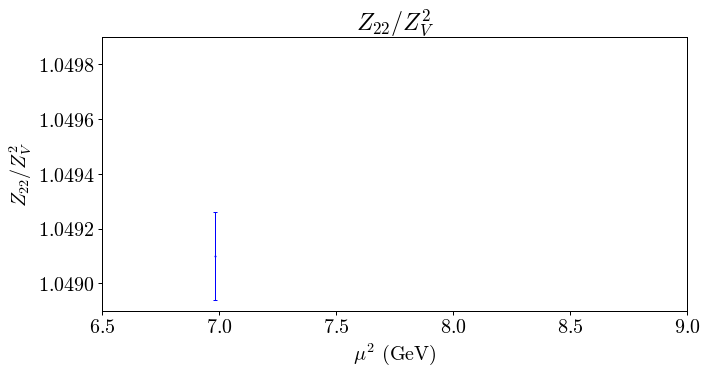

In [21]:
fig, ax = pt.add_subplot()
# Z221.04949(12)
pt.plot_1d_data([mu0**2], [1.04910], [0.00016], ax, col = 'b', fn_label = 'downstream')
# pt.plot_1d_data([1], [1.04945], [0.00040], ax, col = 'r', fn_label = 'original')
ax.set_ylim((1.0489, 1.0499))
# ax.set_ylim((1.048, 1.0499))
ax.set_xlim((6.5, 9.0))
ax.set_title('$Z_{22}/Z_V^2$', fontsize = 24)
ax.set_xlabel(r'$\mu^2$ (GeV)')
# ax.set_xticks([mu0])
# ax.set_xticklabels(['Our value'])
# ax.set_yticks([1.0491, 1.0492, 1.0493, 1.0494, 1.0495, 1.0496, 1.0497, 1.0498])
# ax.set_yticklabels(['1.0491', '1.0492', '1.0493', '1.0494', '1.0495', '1.0496', '1.0497', '1.0498'])
ax.set_ylabel('$Z_{22}/Z_V^2$')

### Data analysis

In [10]:
reload(pt)

<module 'plottools' from '/Users/theoares/lqcd/utilities/plottools.py'>

Text(291.494140625, 0.5, '$Z_{22}/Z_V^2$')

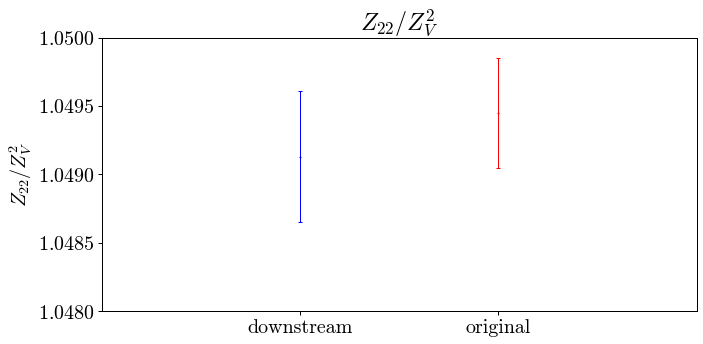

In [11]:
fig, ax = pt.add_subplot()
# Z221.04949(12)
pt.plot_1d_data([0], [1.04913], [0.00048], ax, col = 'b', fn_label = 'downstream')
pt.plot_1d_data([1], [1.04945], [0.00040], ax, col = 'r', fn_label = 'original')
ax.set_ylim((1.048, 1.05))
# ax.set_ylim((1.048, 1.0499))
ax.set_xlim((-1, 2))
ax.set_title('$Z_{22}/Z_V^2$', fontsize = 24)
ax.set_xlabel('')
ax.set_xticks([0, 1])
ax.set_xticklabels(['downstream', 'original'])
# ax.set_yticks([1.0491, 1.0492, 1.0493, 1.0494, 1.0495, 1.0496, 1.0497, 1.0498])
# ax.set_yticklabels(['1.0491', '1.0492', '1.0493', '1.0494', '1.0495', '1.0496', '1.0497', '1.0498'])
ax.set_ylabel('$Z_{22}/Z_V^2$')

Text(291.494140625, 0.5, '$Z_{22}/Z_V^2$')

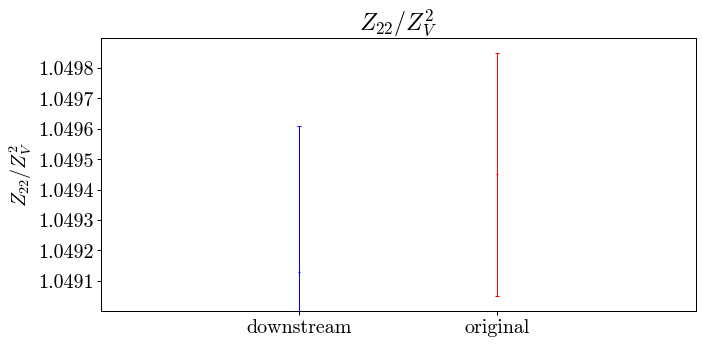

In [12]:
fig, ax = pt.add_subplot()
pt.plot_1d_data([0], [1.04913], [0.00048], ax, col = 'b', fn_label = 'downstream')
pt.plot_1d_data([1], [1.04945], [0.00040], ax, col = 'r', fn_label = 'original')
ax.set_ylim((1.049, 1.0499))
# ax.set_ylim((1.048, 1.0499))
ax.set_xlim((-1, 2))
ax.set_title('$Z_{22}/Z_V^2$', fontsize = 24)
ax.set_xlabel('')
ax.set_xticks([0, 1])
ax.set_xticklabels(['downstream', 'original'])
ax.set_yticks([1.0491, 1.0492, 1.0493, 1.0494, 1.0495, 1.0496, 1.0497, 1.0498])
ax.set_yticklabels(['1.0491', '1.0492', '1.0493', '1.0494', '1.0495', '1.0496', '1.0497', '1.0498'])
ax.set_ylabel('$Z_{22}/Z_V^2$')

Text(291.494140625, 0.5, '$Z_{22}/Z_V^2$')

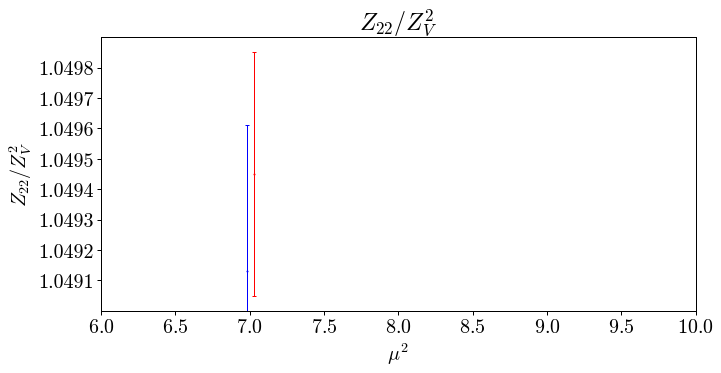

In [13]:
mu0sq = 6.98
eps = 0.05
fig, ax = pt.add_subplot()
pt.plot_1d_data([mu0sq], [1.04913], [0.00048], ax, col = 'b', fn_label = 'downstream')
pt.plot_1d_data([mu0sq + eps], [1.04945], [0.00040], ax, col = 'r', fn_label = 'original')
ax.set_ylim((1.049, 1.0499))
ax.set_xlim((6, 10))
ax.set_title('$Z_{22}/Z_V^2$', fontsize = 24)
ax.set_xlabel('$\mu^2$')
# ax.set_xticks([mu0**2])
# ax.set_xticklabels(['7.02'])
ax.set_yticks([1.0491, 1.0492, 1.0493, 1.0494, 1.0495, 1.0496, 1.0497, 1.0498])
ax.set_yticklabels(['1.0491', '1.0492', '1.0493', '1.0494', '1.0495', '1.0496', '1.0497', '1.0498'])
ax.set_ylabel('$Z_{22}/Z_V^2$')

In [11]:
Z22005_inv = 1 / Z22005_b
Z2201_inv = 1 / Z2201_b

In [16]:
np.std(Z22005_inv, ddof = 1)

7.05518e-05

In [15]:
np.mean(Z22005_inv)

(0.95301986+3.4059885e-05j)

In [17]:
np.std(Z2201_inv, ddof = 1)

0.00010735677

In [14]:
np.mean(Z2201_inv)

(0.9528429+2.3538787e-05j)